$\Delta v = v_elog\frac{m_0}{m_f} = I_{sp}g_0log\frac{m_0}{m_f}$

$v^2 = GM\big(\frac{2}{r}-\frac{1}{a}\big)$

$\Delta v_s \approx \sqrt{\frac{\mu}{r_0}} - \sqrt{\frac{\mu}{r}}$

$r_{SOI} = a\big(\frac{m}{M}\big)^{\frac{2}{5}}$

$v^2 = GM\bigg(\frac{2}{r}-\frac{1}{a}\bigg)$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 5, 4
plt.rcParams['figure.dpi']= 72

In [25]:
G = 6.67e-11;
Me = 5.97e24;
Mm = 7.34e22
Re = 6.37e06;
LD = 384402e3
r_SOI_L = LD*(Mm/Me)**(2/5)

In [1]:
# Delta-V Budget.
ISPs = [420,720,1020];
g0 = 9.8;
massRate = np.linspace(1,2,100);

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
for ISP in ISPs:
    deltaV = ISP*g0*np.log(massRate);
    plt.plot(1-massRate**-1,deltaV/1000, label=str(ISP)+" s");
    
plt.title("$\Delta$V Budget");
plt.xlabel("$m_p/m_0$");
plt.ylabel("$\Delta$V [km/s]");

plt.grid();    
plt.legend();

# Delta-V Requirements.
# Spiral
plt.subplot(1,2,2)
radiusFraction = np.linspace(1,60,100);
r0s = [6870e3,35786e3+Re]
for r0 in r0s:
    r = radiusFraction*r0;
    deltaVspiral = (G*Me/r0)**0.5-(G*Me/r)**0.5;
    
    LDMark = (np.abs(radiusFraction-LD/r0)).argmin()
    apophisMark = (np.abs(radiusFraction-0.1*LD/r0)).argmin()
    LSOIMark = (np.abs(radiusFraction-(LD-r_SOI_L)/r0)).argmin()
    plt.plot(radiusFraction,deltaVspiral/1000,'-o', markevery=[apophisMark,LSOIMark,LDMark]);
    
plt.title("$\Delta$V Requeriments Spiral");
plt.xlabel("$r/r0$");
plt.ylabel("$\Delta$V [km/s]");

plt.grid();
plt.legend(["r0 = LEO ("+str((6870e3-Re)/1000)+" km alt)","r0 = GEO ("+str(35786e3/1000)+" km alt)"]);

# Ellipse Ascent
plt.figure(figsize=(7, 5))
for r0 in r0s:
    r = radiusFraction*r0;
    a0 = r0;
    af = (r+r0)/2;
    deltaVellipseAscent = np.sqrt(G*Me*(2/r0-1/af))-np.sqrt(G*Me*(2/r0-1/a0))
    
    LDMark = (np.abs(radiusFraction-LD/r0)).argmin()
    apophisMark = (np.abs(radiusFraction-0.1*LD/r0)).argmin()
    LSOIMark = (np.abs(radiusFraction-(LD-r_SOI_L)/r0)).argmin()
    
    plt.plot(radiusFraction,deltaVellipseAscent/1000, "-o", markevery=[apophisMark,LSOIMark,LDMark])
plt.title("$\Delta$V Requeriments Ellipse Ascent Only");
plt.xlabel("$r/r0$");
plt.ylabel("$\Delta$V [km/s]");
plt.grid()
plt.legend(["r0 = LEO ("+str((6870e3-Re)/1000)+" km alt)","r0 = GEO ("+str(35786e3/1000)+" km alt)"]);

NameError: name 'np' is not defined

### Rate of climb
<strong>Ward Spiral</strong>

Radius:

$r  = \frac{r_0}{\bigg(1-\frac{D'}{m}\sqrt{\frac{r_0}{\mu}}t\bigg)^2}$

Angle Swept:

$\theta_w = \frac{m}{D'}\frac{\mu}{r_0^2}\bigg(1-\sqrt{\frac{r_0}{r}}\bigg)$

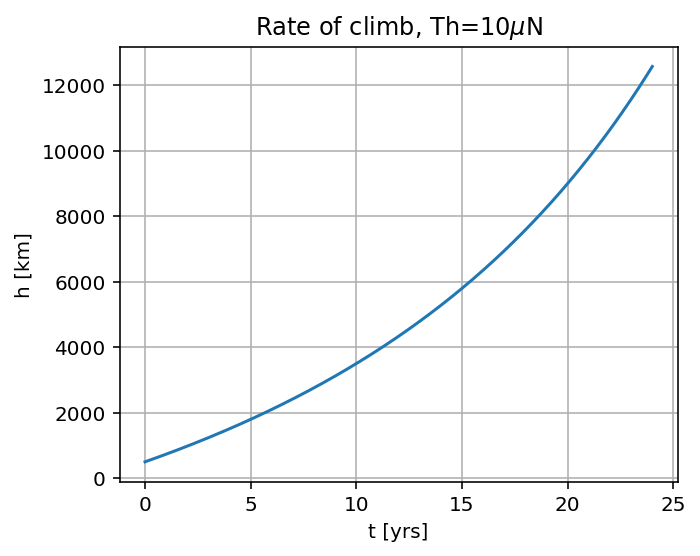

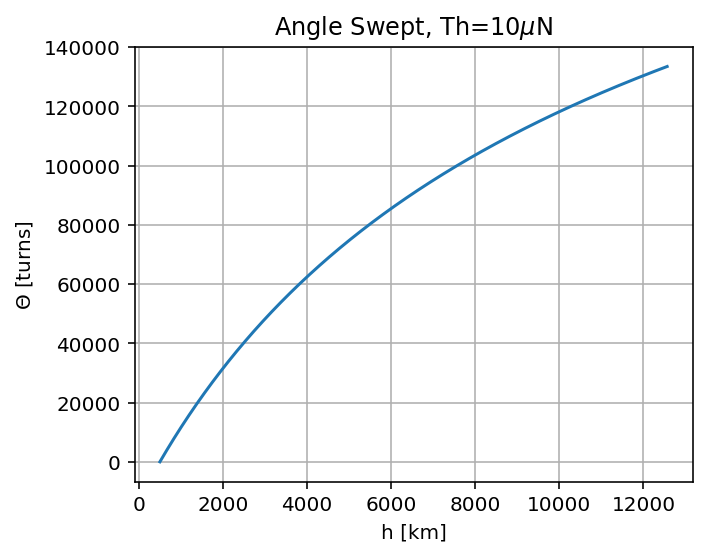

In [27]:
Th = 10e-6;
m = 2.5;
r0 = Re+500e3;
t = np.linspace(0,60*60*24*365*24,1000);

# Rate of Climb
plt.figure()
r = r0/(1-Th/m*(r0/(G*Me))**0.5*t)**2;
plt.plot(t/(60*60*24*365),(r-Re)/1000);
plt.grid();
plt.title("Rate of climb, Th=10$\mu$N");
plt.xlabel("t [yrs]");
plt.ylabel("h [km]");

# Angle Swept
plt.figure()
theta_w = (m/Th)*(G*Me/r0**2)*(1-(r0/r)**0.5);
plt.plot((r-Re)/1000,theta_w/(2*np.pi));
plt.grid();
plt.title("Angle Swept, Th=10$\mu$N");
plt.xlabel("h [km]");
plt.ylabel("$\Theta$ [turns]");

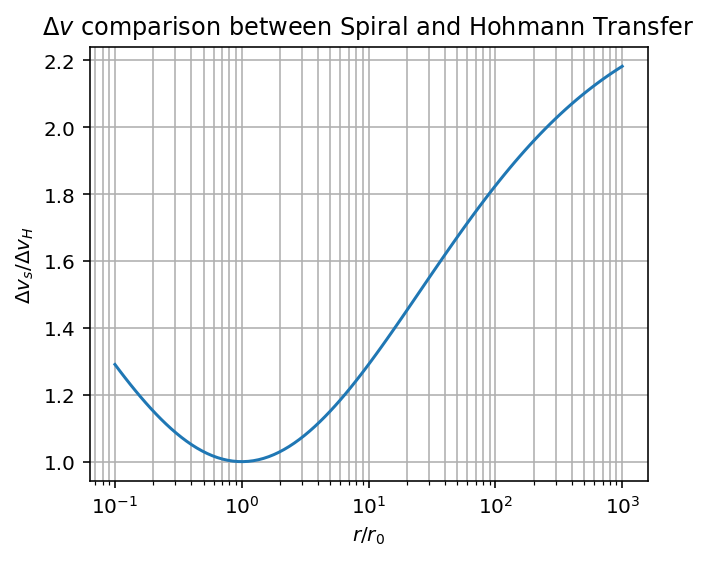

In [28]:
radiusFraction = np.logspace(-1,3,100);
r0 = 1;
r = radiusFraction*r0;
hohmannDeltaV = np.sqrt(G*Me/r0)*(np.sqrt(2*r/(r0+r))-1) + np.sqrt(G*Me/r)*(1-np.sqrt(2*r0/(r0+r)));
spiralDeltaV = (G*Me/r0)**0.5-(G*Me/r)**0.5;
deltaVratio = spiralDeltaV/hohmannDeltaV;
plt.semilogx(radiusFraction,deltaVratio);
plt.grid(True, which="both");
plt.title("$\Delta v$ comparison between Spiral and Hohmann Transfer");
plt.xlabel("$r/r_0$");
plt.ylabel("$\Delta v_s / \Delta v_H$");

# Phasing/Walking
$\Delta v = \frac{2}{3}\frac{r_0\Delta\theta}{\Delta t - t_1}$

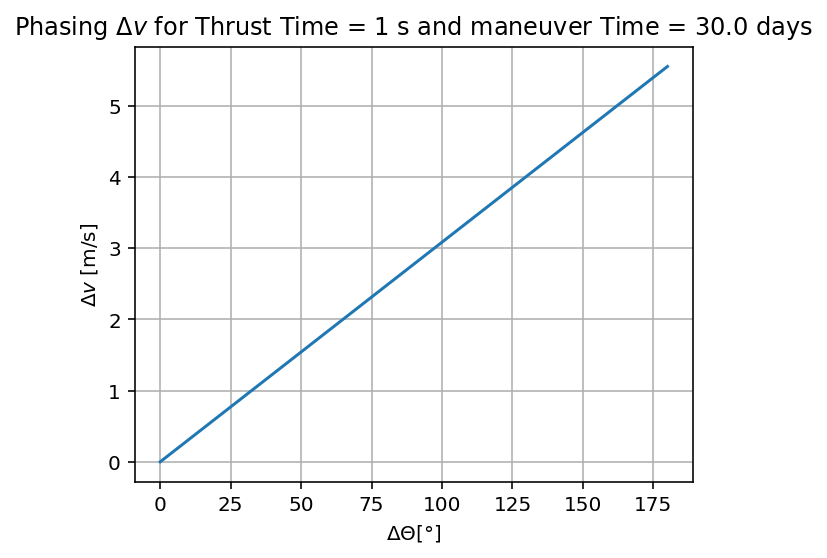

In [29]:
r0 = Re+500e3
deltaTheta = np.linspace(0,np.pi,100);
deltaT = 60*60*24*30;
t1 = 1;
phasingDeltaV = 2*r0*deltaTheta/(3*(deltaT-t1));
plt.plot(deltaTheta/np.pi*180, phasingDeltaV);
plt.grid();
plt.title("Phasing $\Delta v$ for Thrust Time = "+str(t1)+" s and maneuver Time = "+str(deltaT/60/60/24)+" days");
plt.xlabel("$\Delta\Theta [°]$");
plt.ylabel("$\Delta v$ [m/s]");

## Inclination Change (Low Thrust, Near Circular)
$\Delta v = v\sqrt{2-2cos(\frac{\pi}{2}\Delta i})$

$v = \sqrt{\frac{GM_e}{r}}$


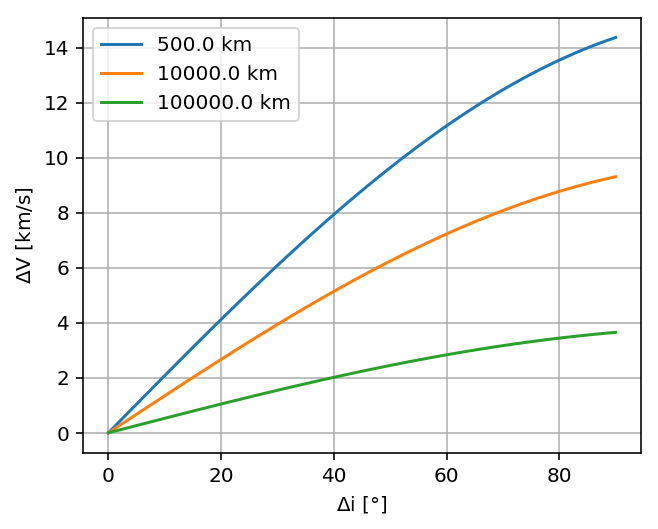

In [30]:
hs = [500e3,10000e3,100000e3]
for h in hs:
    r = Re+h;
    v = (G*Me/r)**0.5
    deltaI = np.linspace(0,np.pi/2,100);
    deltaVinc = v*(2-2*np.cos(np.pi/2*deltaI))**0.5;
    plt.plot(deltaI/np.pi*180,deltaVinc/1000,label=str(h/1000)+" km");
plt.grid()
plt.xlabel("$\Delta$i [°]");
plt.ylabel("$\Delta$V [km/s]");
plt.legend();

## RAAN Change (Low Thrust, Near Circular)
$\Delta v = \frac{\pi}{2}\sqrt{\frac{GM_e}{a}}|\Delta\Omega|sin(i)$

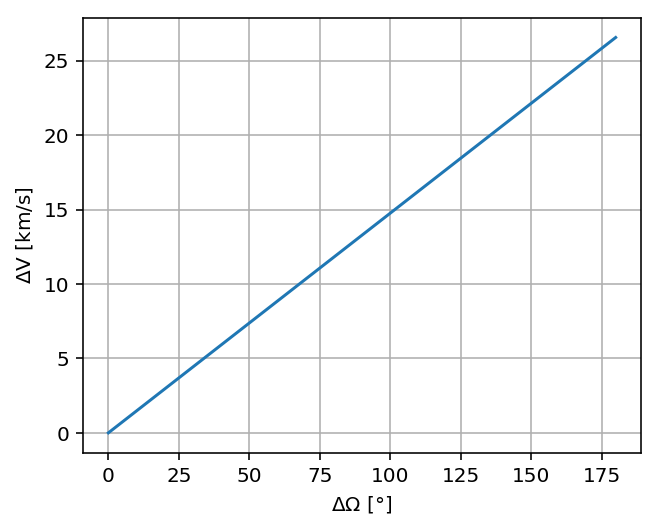

In [31]:
i = 45*np.pi/180;
a = Re+500e3;
deltaOmega = np.linspace(0,np.pi,100);
deltaVRAAN = np.pi/2*(G*Me/a)**0.5*deltaOmega*np.sin(i)
plt.plot(deltaOmega*180/np.pi,deltaVRAAN/1000);
plt.grid()
plt.xlabel("$\Delta\Omega$ [°]");
plt.ylabel("$\Delta$V [km/s]");